# GRIP_JULY - 2021  (TASK 2)

# Task Name:- Color Identification in Images

# Domain:- Computer Vision and IOT

# Name:- Akash Singh

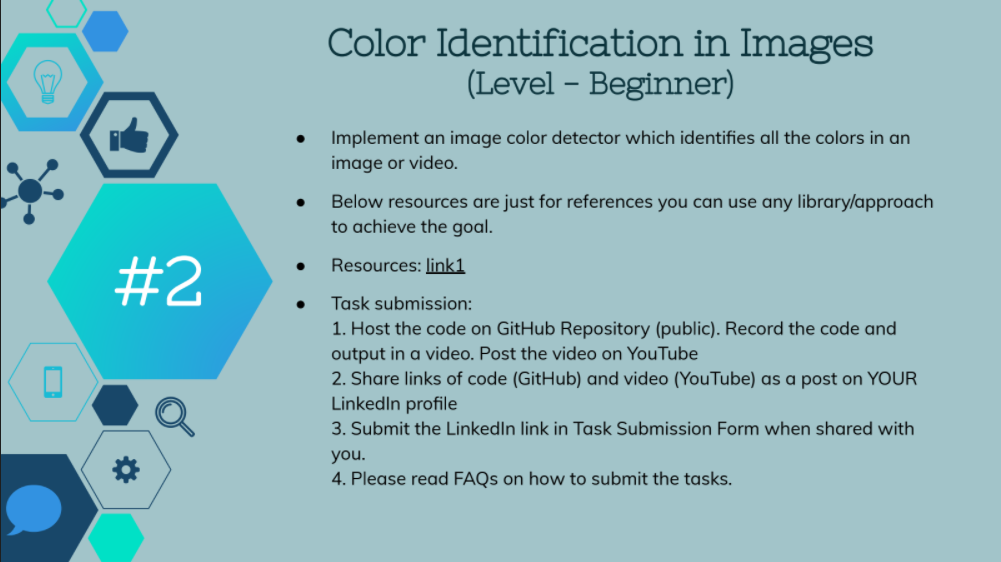

### Importing the required libraries

In [3]:
import cv2
import pandas as pd

### Saving the image and csv file path into variables

In [1]:
img_path = 'pic2.jpg'
csv_path = 'colors.csv'

### Reading the .csv file(Containing all the colors,hex,RGB components) and naming the columns

In [4]:
index = ['color','color_name','hex','R','G','B']
df = pd.read_csv(csv_path, names=index,header = None)

### Reading the image

In [6]:
img = cv2.imread(img_path)

#Resizing the image to 800x600

img = cv2.resize(img,(800,600))

#Initializing the variables

clicked = False
r = g = b = xpos = ypos = 0


#Function to compare the RGB values on (x,y) coordinates of the image
#Returning the color name

def get_color_name(R,G,B):
    minimum = 1000
    for i in range(len(df)):
        d = abs(R-int(df.loc[i,'R'])) + abs(G-int(df.loc[i,'G'])) + abs(B-int(df.loc[i,'B']))
        if d <= minimum:
            minimum = d
            cname = df.loc[i,'color_name']
    return cname

#Function to get the coordinates of the mouse pointer when double clicked on the image
#Saving the RGB values on those coordinates into the variables

def draw_function(event,x,y,flags,params):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global clicked,r,g,b,xpos,ypos
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)

#Creating the window for image

cv2.namedWindow('image')

#Binding the draw_function to the mouse pointer

cv2.setMouseCallback('image', draw_function)

while True:
    cv2.imshow('image',img)
    if clicked:
        #Making a colored strip to show our text on
        cv2.rectangle(img, (20,20), (600,60),(b,g,r), -1)

        #Getting the color name and storing in text variable
        text = get_color_name(r,g,b) + ' R='+ str(r) + ' G=' + str(g) + ' B=' + str(b)

        #Putting the text onto the strip that we created above
        cv2.putText(img,text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)


        if r+g+b >= 600: #If the colors are dim
            cv2.putText(img,text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA) #We want our text to be black

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.waitKey(0)
cv2.destroyAllWindows()